# Pengantar 


---
**Pengertian Transfer Learning**

"Transfer learning adalah suatu teknik atau metode yang memanfaatkan model yang sudah dilatih terhadap suatu dataset untuk menyelesaikan permasalahan lain yang serupa dengan cara menggunakannya sebagai starting point, memodifikasi dan mengupdate parameternya sehingga sesuai dengan dataset yang baru."

Transfer Learning merupakan model yang sebelumnya telah dilatih dengan menggunakan ImageNet


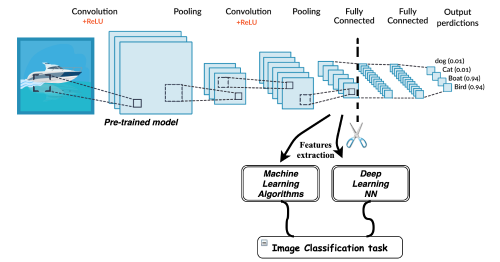



---

**Apa Alasan Menggunakan Transfer Learning**



*   **Banyak fitur berguna yang telah dipelajari**: Model telah mempelajari cara mendeteksi fitur umum dari foto, mengingat mereka telah dilatih pada lebih dari 1.000.000 gambar untuk 1.000 kategori.
*   **Performa luar biasa**: Model mencapai performa cukup baik dan tetap efektif pada tugas pengenalan gambar spesifik yang dikembangkannya.


*   **Mudah diakses**: Bobot model disediakan sebagai file yang dapat diunduh gratis dan banyak library menyediakan API yang mudah untuk mengunduh dan menggunakan model secara langsung.







---

**Beberapa Model Untuk Transfer Learning**


1.   VGG (misalnya VGG16 atau VGG19).
2.   GoogLeNet (mis. InceptionV3)
3.   Jaringan Residual (misalnya ResNet50).





# Download Data From Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/Kaggle"

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Kaggle

/content/gdrive/MyDrive/Colab Notebooks/Kaggle


In [ ]:
!kaggle datasets download -d waifuai/cat2dog

 73% 20.0M/27.4M [00:00<00:00, 89.5MB/s]
100% 27.4M/27.4M [00:00<00:00, 91.2MB/s]


In [ ]:
!mv "/content/gdrive/MyDrive/Colab Notebooks/Kaggle/cat2dog.zip" "/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset"

In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset

/content/gdrive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  cat2dog.zip
  inflating: cat2dog/cat2dog/testA/103.jpg  
  inflating: cat2dog/cat2dog/testA/104.jpg  
  inflating: cat2dog/cat2dog/testA/13.jpg  
  inflating: cat2dog/cat2dog/testA/136.jpg  
  inflating: cat2dog/cat2dog/testA/138.jpg  
  inflating: cat2dog/cat2dog/testA/14.jpg  
  inflating: cat2dog/cat2dog/testA/143.jpg  
  inflating: cat2dog/cat2dog/testA/144.jpg  
  inflating: cat2dog/cat2dog/testA/171.jpg  
  inflating: cat2dog/cat2dog/testA/176.jpg  
  inflating: cat2dog/cat2dog/testA/178.jpg  
  inflating: cat2dog/cat2dog/testA/192.jpg  
  inflating: cat2dog/cat2dog/testA/195.jpg  
  inflating: cat2dog/cat2dog/testA/21.jpg  
  inflating: cat2dog/cat2dog/testA/213.jpg  
  inflating: cat2dog/cat2dog/testA/214.jpg  
  inflating: cat2dog/cat2dog/testA/221.jpg  
  inflating: cat2dog/cat2dog/testA/228.jpg  
  inflating: cat2dog/cat2dog/testA/253.jpg  
  inflating: cat2dog/cat2dog/testA/254.jpg  
  inflating: cat2dog/cat2dog/testA/26.jpg  
  inflating: cat2dog/cat2dog/testA/26

# Cek Dataset

In [ ]:
# check quantity of images in training and testing using lambda
import os

train_dir = "/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset/cat2dog/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset/cat2dog/test"

cat_train_path = train_dir + '/cats'
dog_train_path = train_dir + '/dogs'
cat_val_path = val_dir + '/cats'
dog_val_path = val_dir + '/dogs'

cat_len_train = len(os.listdir(cat_train_path))
dog_len_train = len(os.listdir(dog_train_path))
cat_len_val = len(os.listdir(cat_val_path))
dog_len_val = len(os.listdir(dog_val_path))

print("jumlah dataset Training : ", cat_len_train + dog_len_train)
print("jumlah dataset validasi : ", cat_len_val + dog_len_val)
print("\n\n")
print("jumlah train kelas Cat : ", cat_len_train)
print("jumlah train kelas Dog : ", dog_len_train)
print("jumlah validasi kelas Cat : ", cat_len_val)
print("jumlah validasi kelas Dog : ", dog_len_val)


jumlah dataset Training :  2035
jumlah dataset validasi :  200



jumlah train kelas Cat :  771
jumlah train kelas Dog :  1264
jumlah validasi kelas Cat :  100
jumlah validasi kelas Dog :  100


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


AUgmentasi :
1. pada kasus ini dilakukan augmentasi untuk menghindari adanya overfitting pada saat pelatihan
2. augmentasi memungkinkan gambar training untuk dioptimalisasi seluruh infomasinya berupa melakukan rotate, shear, zoom, horizontal_flop, dan lainnya. sehingga ketika model dilatih menggunakan data yang memiliki angel (posisi) yang berbeda dapat teratasi karena menerapkan augmentasi 

# Augmentasi Dataset

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')


Found 2035 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Arsitektur Model and Fit Model

In [ ]:
'''
Import Library yang dibutuhkan
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
'''
definisikan dan setting callback untuk :
1. memantau performa model
2. melakukan save model terbaik menggunakan model checkpoint
3. memberhentikan pelatihan ketika tidak memnuhi syarat dalam parameter earlystopping
'''

callbacks = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /7. Transfer Learning /model_drop_batch_weight_from_callback_2.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
'''
definisikan pretrained model yang ingin digunakan
'''

VGG16_base = tf.keras.applications.VGG16(include_top=False, weights='imagenet', #include_top = false , berarti fully connected layer akan dipidah dari arsitektur
                                                 input_tensor=None, input_shape=(224, 224,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
'''
melakukan setting bahwa model pretrained tidak akan dilatih ulang
'''

VGG16_base.trainable = False

In [ ]:
'''
mendefinisikan layer pada bagian fully connected layer
'''

print('Adding new layers')
output = VGG16_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(256,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(256,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(1, activation='sigmoid')(output) 
print('New layers Finishing Added!!!!')

Adding new layers
New layers Finishing Added!!!!


In [ ]:
VGG16_model = Model(VGG16_base.input, output)

VGG16_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
VGG16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', 
                        metrics =['accuracy'])

In [ ]:
history = VGG16_model.fit(
      train_generator,
      steps_per_epoch=102,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,  #  images = batch_size * steps
      callbacks = [callbacks, best_model])

Epoch 1/100
102/102 [==============================] - ETA: 0s - loss: 0.3680 - accuracy: 0.8201
Epoch 00001: val_accuracy improved from -inf to 0.99500, saving model to /content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /7. Transfer Learning /model_drop_batch_weight_from_callback_2.h5
102/102 [==============================] - 39s 369ms/step - loss: 0.3680 - accuracy: 0.8201 - val_loss: 0.1056 - val_accuracy: 0.9950
Epoch 2/100
102/102 [==============================] - ETA: 0s - loss: 0.1704 - accuracy: 0.9332
Epoch 00002: val_accuracy did not improve from 0.99500
102/102 [==============================] - 37s 363ms/step - loss: 0.1704 - accuracy: 0.9332 - val_loss: 0.0413 - val_accuracy: 0.9900
Epoch 3/100
102/102 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9489
Epoch 00003: val_accuracy did not improve from 0.99500
102/102 [==============================] - 37s 358ms/step - loss: 0.1272 - accuracy: 0.9489 - val_loss: 0.0292 - val_ac

# Model Evaluation

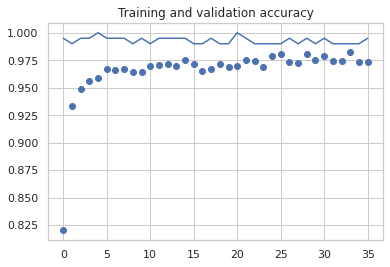

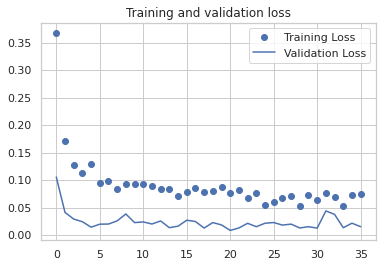

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /7. Transfer Learning /model_drop_batch_weight_from_callback_2.h5'
model = load_model(model_path)

Found 200 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 1.0
Precision : 1.0
f1Score : 1.0
[[100   0]
 [  0 100]]


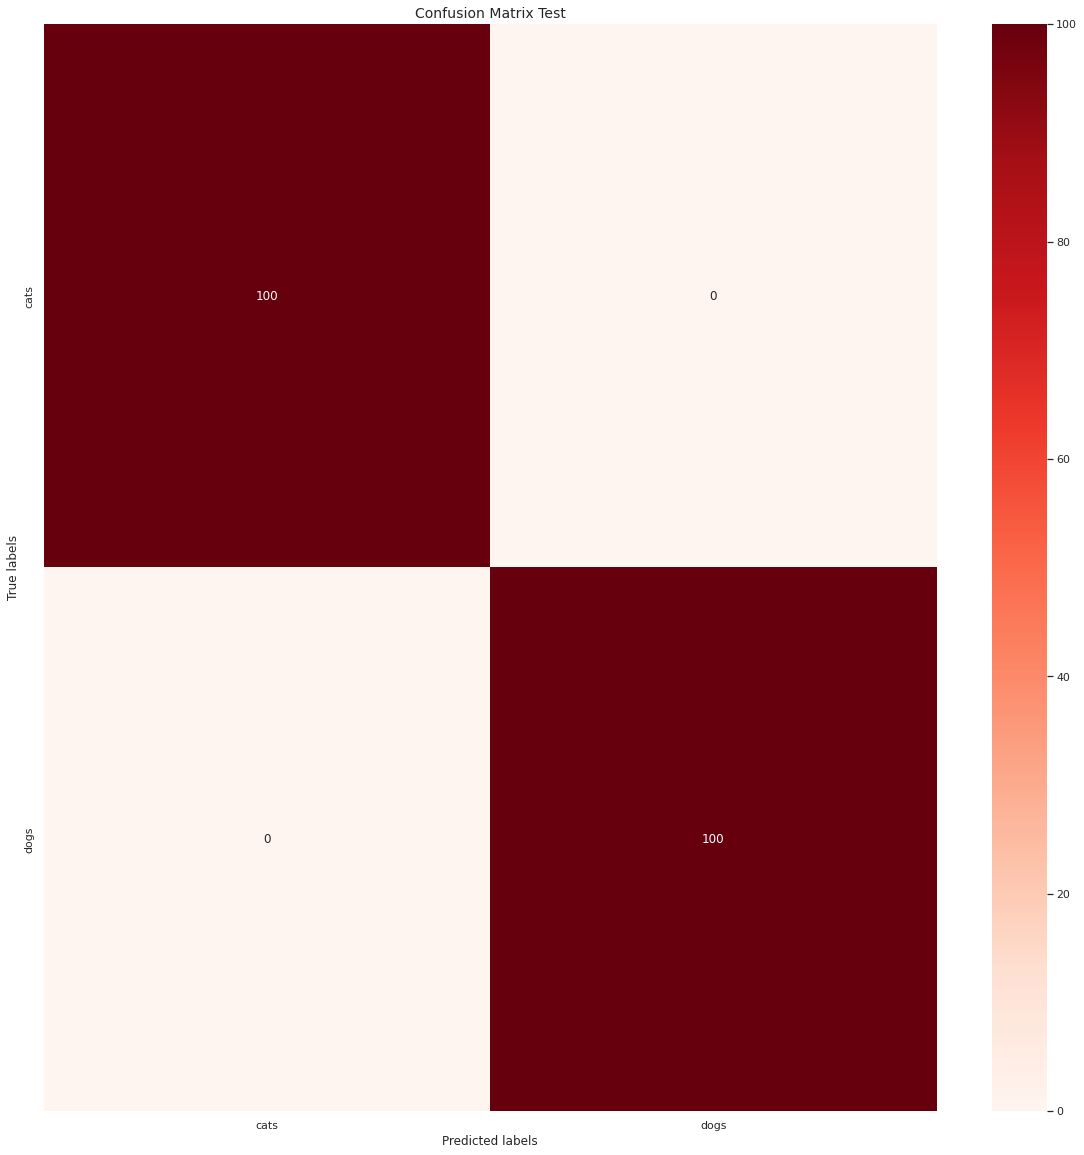

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=224; width=224
batch_size=20

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/drive/MyDrive/Colab Notebooks/Modul Kecerdasan Buatan Pak Galih /6. CNN (Convolutional Neural Network)/Dataset/cat2dog/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

        cats       1.00      1.00      1.00       100
        dogs       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

